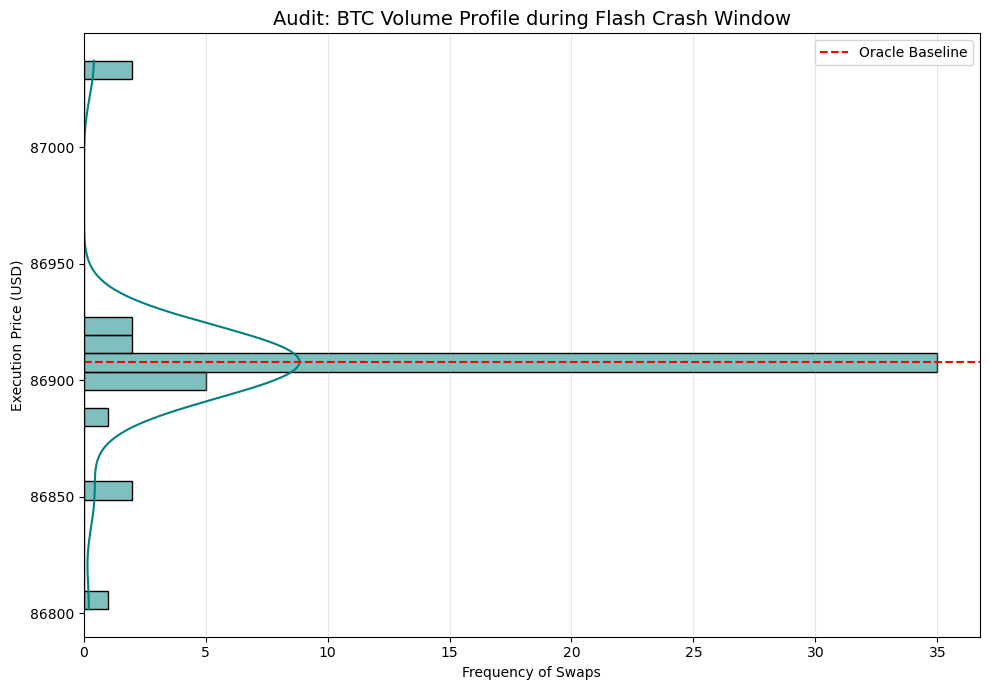

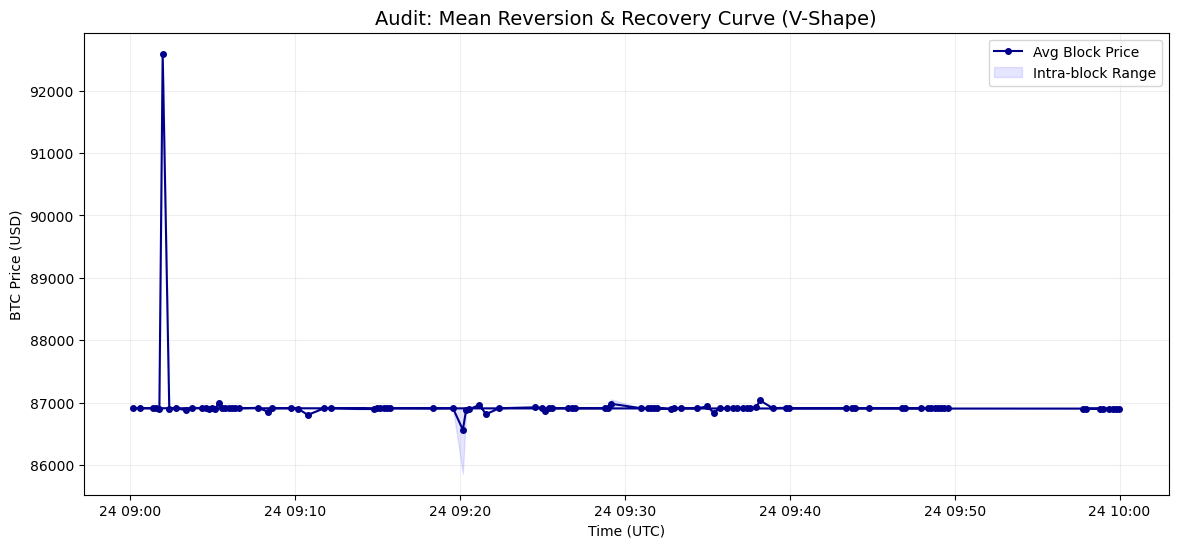

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load and Fix Data ---
df_raw = pd.read_csv('Sheet2.csv')
df_blocks = pd.read_csv('Sheet4.csv')

def fix_time(t):
    t = str(t).strip()
    return f"2025-12-24 09:{t}" if len(t.split(':')) == 2 else f"2025-12-24 {t}"

df_raw['Block timestamp'] = pd.to_datetime(df_raw['Block timestamp'].apply(fix_time))
df_blocks['Block timestamp'] = pd.to_datetime(df_blocks['Block timestamp'].apply(fix_time))

# --- 2. Visualization: Price Volume Profile (Histogram) ---
# Purpose: Identify the "Gravity Center" of the crash.
plt.figure(figsize=(10, 7))
sns.histplot(data=df_raw, y='Btc spot price usd', bins=30, kde=True, color='teal')
plt.axhline(y=86908, color='red', linestyle='--', label='Oracle Baseline')
plt.title('Audit: BTC Volume Profile during Flash Crash Window', fontsize=14)
plt.ylabel('Execution Price (USD)')
plt.xlabel('Frequency of Swaps')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# --- 3. Visualization: V-Shape Recovery Timeline ---
# Purpose: Demonstrate how quickly the market returned to efficiency.
plt.figure(figsize=(14, 6))
plt.plot(df_blocks['Block timestamp'], df_blocks['Avg price'], marker='o', markersize=4, label='Avg Block Price', color='darkblue')
plt.fill_between(df_blocks['Block timestamp'], df_blocks['Min price'], df_blocks['Max price'], color='blue', alpha=0.1, label='Intra-block Range')

plt.title('Audit: Mean Reversion & Recovery Curve (V-Shape)', fontsize=14)
plt.xlabel('Time (UTC)')
plt.ylabel('BTC Price (USD)')
plt.legend()
plt.grid(alpha=0.2)
plt.show()